In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import scale
import seaborn as sns
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 15\forestfires.csv')

C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

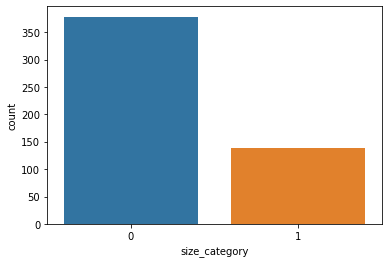

In [3]:
data = data_raw.drop(columns = ['month', 'day'])
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})
sns.countplot(data['size_category'])

In [4]:
data.duplicated().sum()

8

In [5]:
data.drop_duplicates(keep=False,inplace=True)

In [6]:
data.shape

(501, 29)

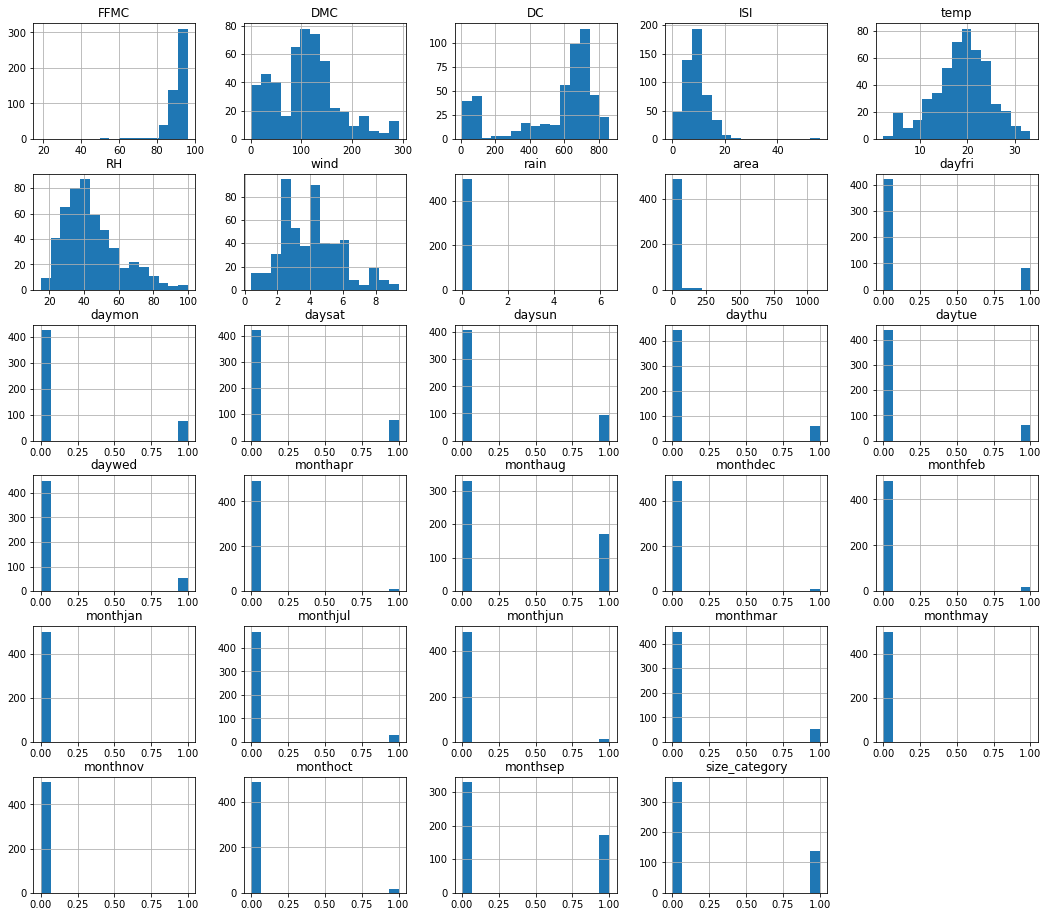

In [7]:
data.hist(figsize=(18,16),bins = 15)
plt.title("Features Distribution")
plt.show()

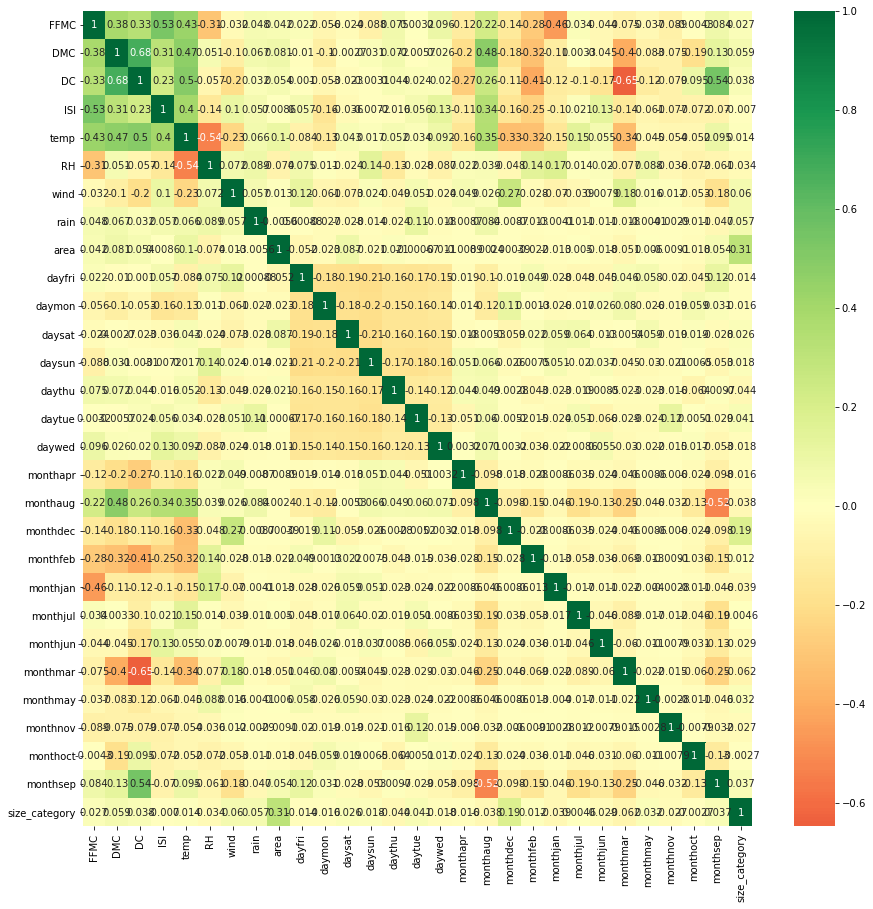

In [8]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [9]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 42)

In [10]:
resample = SMOTE()
X_train_res, y_train_res = resample.fit_resample(X_train, y_train)
X_train_scaled = scale(X_train_res)
X_test_scaled = scale(X_test)

In [11]:
#Model

In [12]:
input_size = len(X.columns)
output_size = 2

def optimal_model(activation_function, hidden_layer_size, optimizer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size,
                                   activation = activation_function))
    model.add(tf.keras.layers.Dense(hidden_layer_size,
                                   activation = activation_function))
    model.add(tf.keras.layers.Dense(hidden_layer_size,
                                   activation = activation_function))
    model.add(tf.keras.layers.Dense(output_size, activation = 'softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,
                 metrics = ['accuracy'])
    return model

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = optimal_model, verbose = 0)

activation_function = ['relu', 'sigmoid']
hidden_layer_size = [10, 30, 50]
optimizer = ['adam', 'sgd']
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

params_grid = dict(activation_function = activation_function,
                  hidden_layer_size = hidden_layer_size, optimizer = optimizer, epochs = [50],
                  validation_split = [0.1])

grid = GridSearchCV(estimator = model, param_grid = params_grid, cv = 5, verbose = 2)
results = grid.fit(X_train_scaled, y_train_res)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=adam, validation_split=0.1; total time=   4.4s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=adam, validation_split=0.1; total time=   4.5s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=adam, validation_split=0.1; total time=   6.1s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=adam, validation_split=0.1; total time=   3.6s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=adam, validation_split=0.1; total time=   3.2s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=sgd, validation_split=0.1; total time=   3.5s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10, optimizer=sgd, validation_split=0.1; total time=   3.1s
[CV] END activation_function=relu, epochs=50, hidden_layer_size=10

In [13]:
results.best_score_, results.best_params_

(0.9231426358222962,
 {'activation_function': 'sigmoid',
  'epochs': 50,
  'hidden_layer_size': 50,
  'optimizer': 'adam',
  'validation_split': 0.1})

In [14]:

hidden_layer_size = 30

model = tf.keras.Sequential([
                                
                                tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                                tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                                tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                                tf.keras.layers.Dense(output_size, activation = 'softmax')
    
    
                                ])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping()
model.fit(X_train_scaled, y_train_res, callbacks = [early_stopping], validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
17/17 - 1s - loss: 0.6627 - accuracy: 0.5661 - val_loss: 0.7905 - val_accuracy: 0.1207


In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.4725 - accuracy: 0.7027


In [18]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 15.47. Test accuracy: 70.27%


# Gas Turbine

In [19]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 15\gas_turbines.csv')
data_raw

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [20]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [21]:
data_raw.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


AT


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


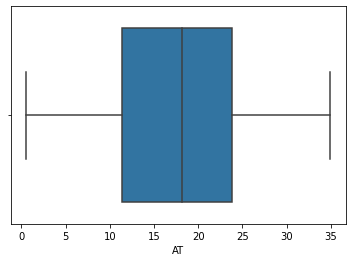

AP


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


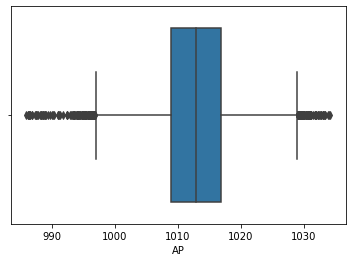

C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AH


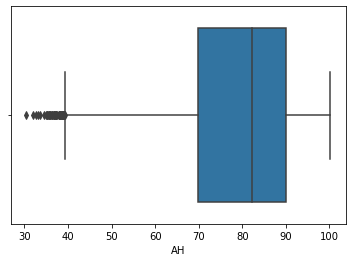

AFDP


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


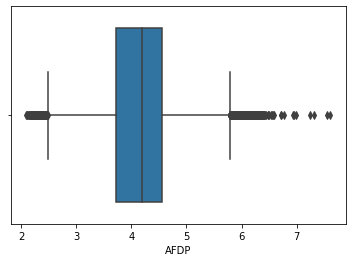

GTEP


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


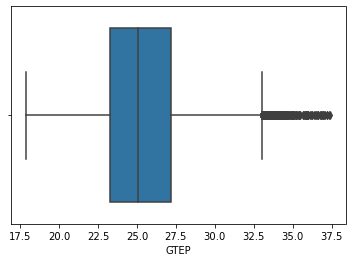

TIT


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


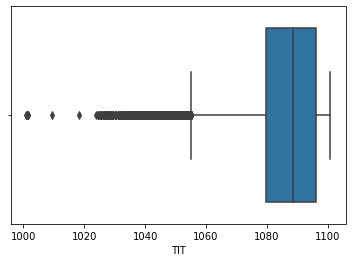

TAT


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


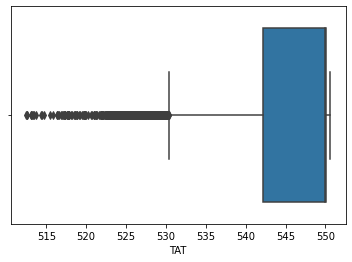

TEY


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


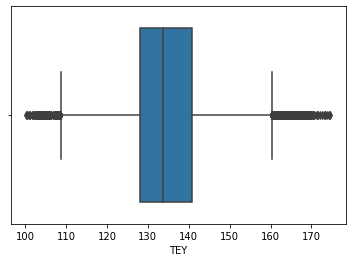

CDP


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


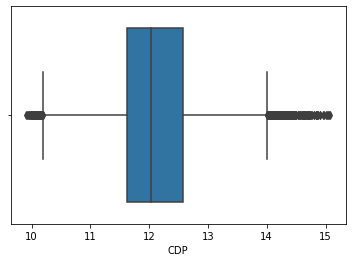

C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CO


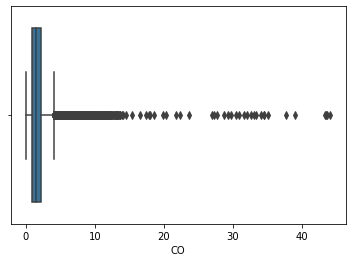

C:\Users\akshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NOX


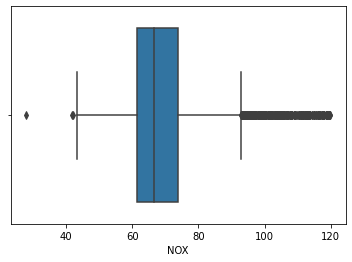

In [22]:
for i in data_raw.columns:
    print(i)
    sns.boxplot(data_raw[i])
    plt.show()

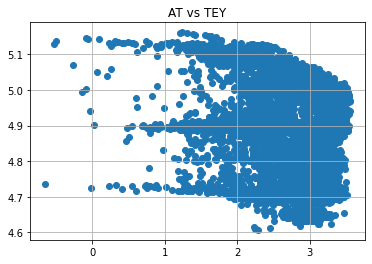

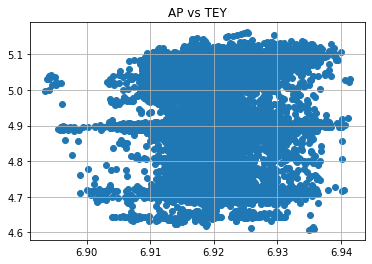

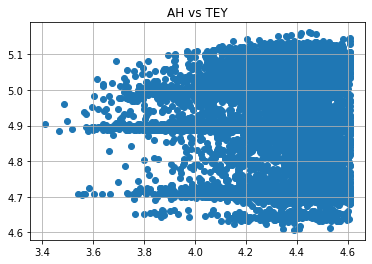

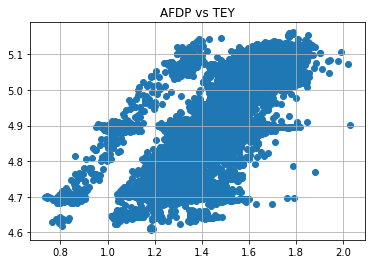

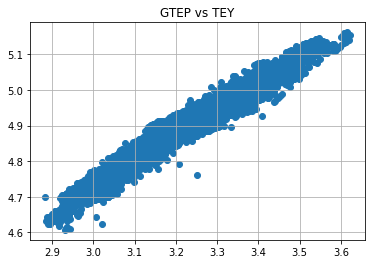

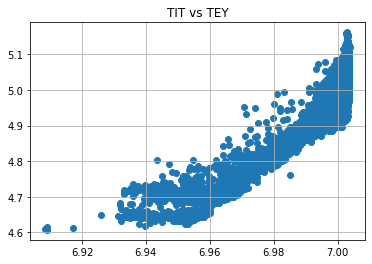

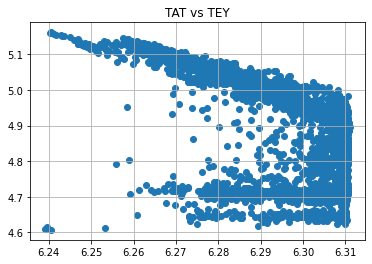

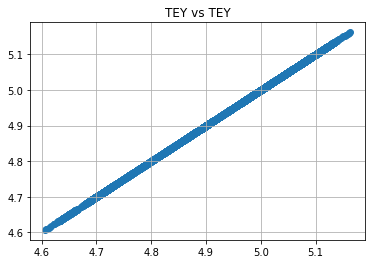

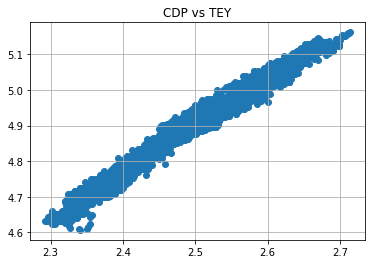

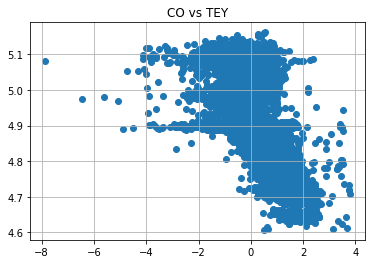

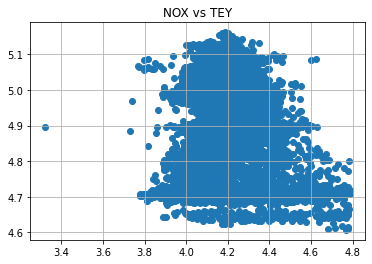

In [23]:
for i in data_raw.columns:
    plt.scatter(np.log(data_raw[i]), np.log(data_raw['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

In [24]:
X = data_raw.drop(columns = ['TEY'], axis = 1) 
y = data_raw.iloc[:,7]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [26]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
    
    
                                ])

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [28]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
381/381 - 1s - loss: 3057.3831 - mean_squared_error: 3057.3831 - val_loss: 172.5938 - val_mean_squared_error: 172.5938
Epoch 2/50
381/381 - 0s - loss: 96.7386 - mean_squared_error: 96.7386 - val_loss: 70.2839 - val_mean_squared_error: 70.2839
Epoch 3/50
381/381 - 0s - loss: 42.8619 - mean_squared_error: 42.8619 - val_loss: 36.5481 - val_mean_squared_error: 36.5481
Epoch 4/50
381/381 - 0s - loss: 22.1837 - mean_squared_error: 22.1837 - val_loss: 19.4135 - val_mean_squared_error: 19.4135
Epoch 5/50
381/381 - 0s - loss: 12.1607 - mean_squared_error: 12.1607 - val_loss: 10.4380 - val_mean_squared_error: 10.4380
Epoch 6/50
381/381 - 0s - loss: 6.7220 - mean_squared_error: 6.7220 - val_loss: 5.8679 - val_mean_squared_error: 5.8679
Epoch 7/50
381/381 - 0s - loss: 3.8460 - mean_squared_error: 3.8460 - val_loss: 2.9003 - val_mean_squared_error: 2.9003
Epoch 8/50
381/381 - 0s - loss: 2.0801 - mean_squared_error: 2.0801 - val_loss: 1.7143 - val_mean_squared_error: 1.7143
Epoch 9/50
381

In [29]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.5012 - mean_squared_error: 0.5012


In [30]:
predictions = model.predict_on_batch(X_test_scaled)

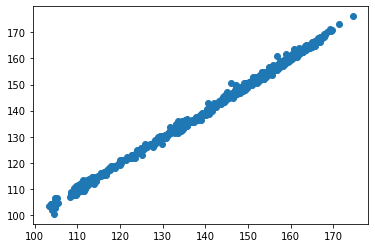

In [31]:
plt.scatter(y_test, predictions)

In [32]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.857513,0.295637
1,111.88,112.208488,0.293608
2,133.72,134.410904,0.516680
3,133.79,133.689026,0.075472
4,110.77,110.909386,0.125833
...,...,...,...
1499,132.85,133.017365,0.125980
1500,125.07,122.946892,1.697536
1501,160.95,161.354935,0.251590
1502,133.12,132.552872,0.426028
